In [ ]:
#可視化

In [110]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

In [112]:
df = pd.read_csv('./Kokokara_uniq.csv', header=0, index_col=0)
print(df)
print(df.columns)
#print(df[df['name']=='ジ－エス・サイエンス株式会社'].index[0])

     corporateNumber uqOperatorCode            name          nameKana  \
id                                                                      
5419   6430001062503          (未登録)  ジ－エス・サイエンス株式会社        ジーエス・サイエンス   
2559   5430001061588          (未登録)     株式会社デービスアクト           デービスアクト   
5332   7460001004658          (未登録)    株式会社プロフォーマンス          プロフォーマンス   
7222   4430003010940          (未登録)        合同会社トーカイ              トーカイ   
8141   4430001070887          (未登録)          株式会社一鐵              イッテツ   
...              ...            ...             ...               ...   
3434   4360001014760          (未登録)       株式会社りっち開発           リッチカイハツ   
8156   7360001020517          (未登録)       株式会社サクラ電工           サクラデンコウ   
8222   9360001025357          (未登録)        大成企業株式会社  タイセイキギョウカブシキガイシャ   
6065   8360001018337          (未登録)         株式会社結電気             ユイデンキ   
7641   1360001025884          (未登録)    株式会社タイズリフォーム          タイズリフォーム   

      location_postalCode  location_prefectureCode

In [113]:
#print(df['location_prefectureCode'])
areas = pd.read_csv('./areas.csv',index_col=0, names=('id','pid','name'))
serviceCategories = pd.read_csv('./serviceCategories.csv', names=('tid','tname','cid','cname','sid','sname','sin','sexample'))
serviceCategories

tid tname  cid   cname  sid            sname   sin  \
0      1    物品    1   物品の製造    1      衣服・その他繊維製品類   101   
1      1    物品    1   物品の製造    2  ゴム・皮革・プラスチック製品類   102   
2      1    物品    1   物品の製造    3         窯業・土石製品類   103   
3      1    物品    1   物品の製造    4       非鉄金属・金属製品類   104   
4      1    物品    1   物品の製造    5           フォーム印刷   105   
..   ...   ...  ...     ...  ...              ...   ...   
232    3    工事  128    清掃施設  233       大気汚染防止設備工事  2805   
233    3    工事  128    清掃施設  234              その他  2806   
234    3    工事  129     その他  235            その他工事  2901   
235    3    工事  130  建設業法以外  236             土木関係  3001   
236    3    工事  130  建設業法以外  237             施設関係  3002   

                                              sexample  
0                   制服、作業服、礼服、寝具、テント、シート、絨毯、カーペット、タオル等  
1                            ゴム、タイヤ、かばん、合成皮革等、FRP 製灯塔等  
2                                     茶碗、湯呑、皿、ガラス、陶磁器等  
3    非鉄金属、金属、アルミ、銅、ステンレス、チタン、ニッケル、鋼材、鋼管、ガードレール、パイプ、...  
4                    フォーム印刷（単票、伝票、連続、複写、ミシン加工、ビジネス帳票等）  
..                                                 ...  
232  清掃施設工事のうち、大気汚染防止のﾌﾟﾗﾝﾄ設備（集塵設備等）の工事（大気汚染防止設備工事）...  
233                                                NaN  
234                                                その他  
235                                  建設業法以外の工事で土木関係のもの  
236                                  建設業法以外の工事で施設関係のもの  

[237 rows x 8 columns]

Text(0.5, 1.0, '都道府県ごとの企業件数（本社）')

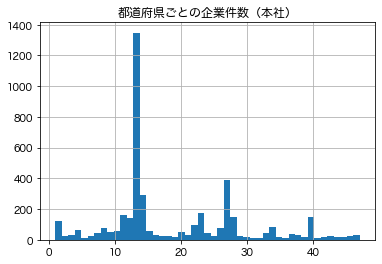

In [114]:
df['location_prefectureCode'].hist(bins=47)
plt.title('都道府県ごとの企業件数（本社）')

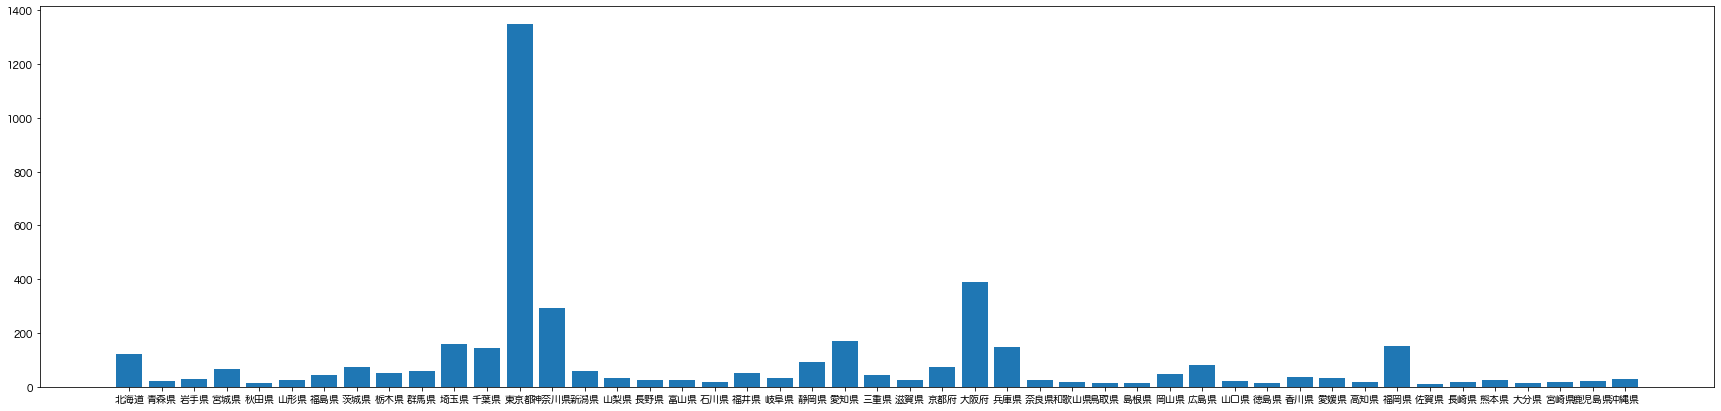

In [115]:
#都道府県ごとの企業件数
fig = plt.figure(figsize=(30, 7))
y = df.groupby('location_prefectureCode').size().tolist()
x = range(len(y))
plt.bar(x,y)
plist = areas['name'].tolist()
plt.xticks(x, plist)  
plt.show()

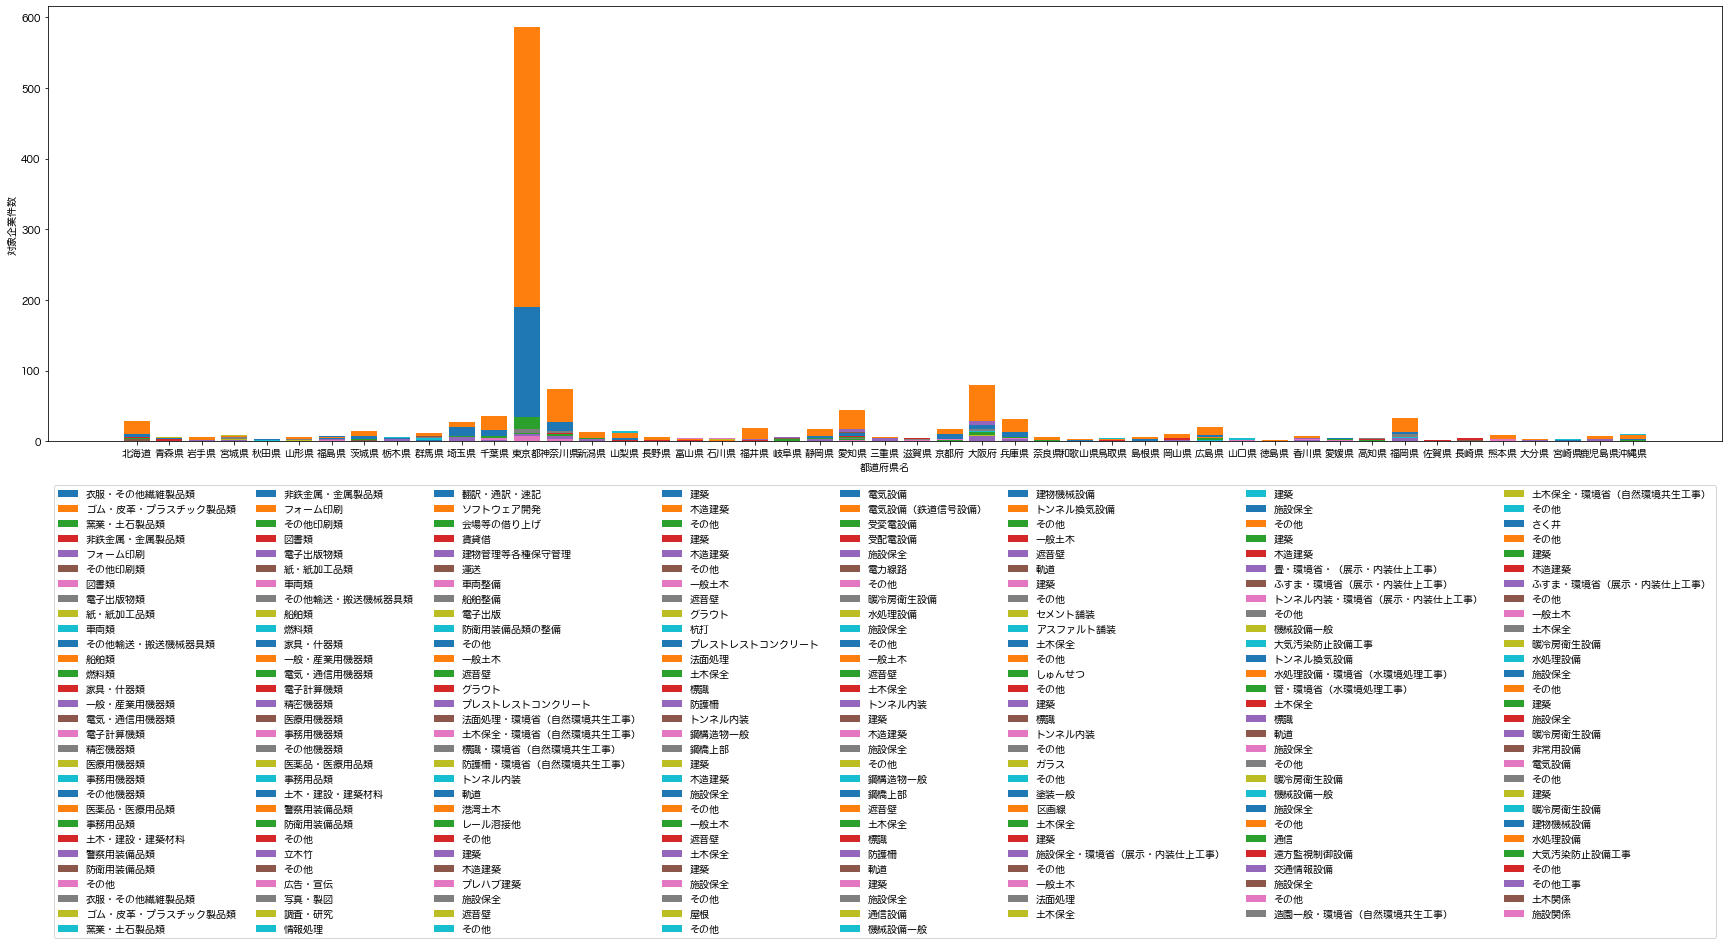

In [116]:
fig, ax = plt.subplots(figsize=(30, 8))
for index, row in enumerate(serviceCategories.iloc):
    y = df.groupby('location_prefectureCode')['services{:0>2}'.format(index+1)].apply(lambda x: (x==1).sum()).reset_index(name='count')['count'].tolist()
    #print(y)
    x = range(len(y))
    #print('service{:0>2}'.format(index+1), val.sname)
    ax.bar(x, y, label=row[5])
ax.set(xlabel='都道府県名', ylabel='対象企業件数')
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1,), borderaxespad=0, ncol=8)
plt.xticks(x, plist)  
plt.show()

Text(0.5, 1.0, '静岡県の業種・業態')

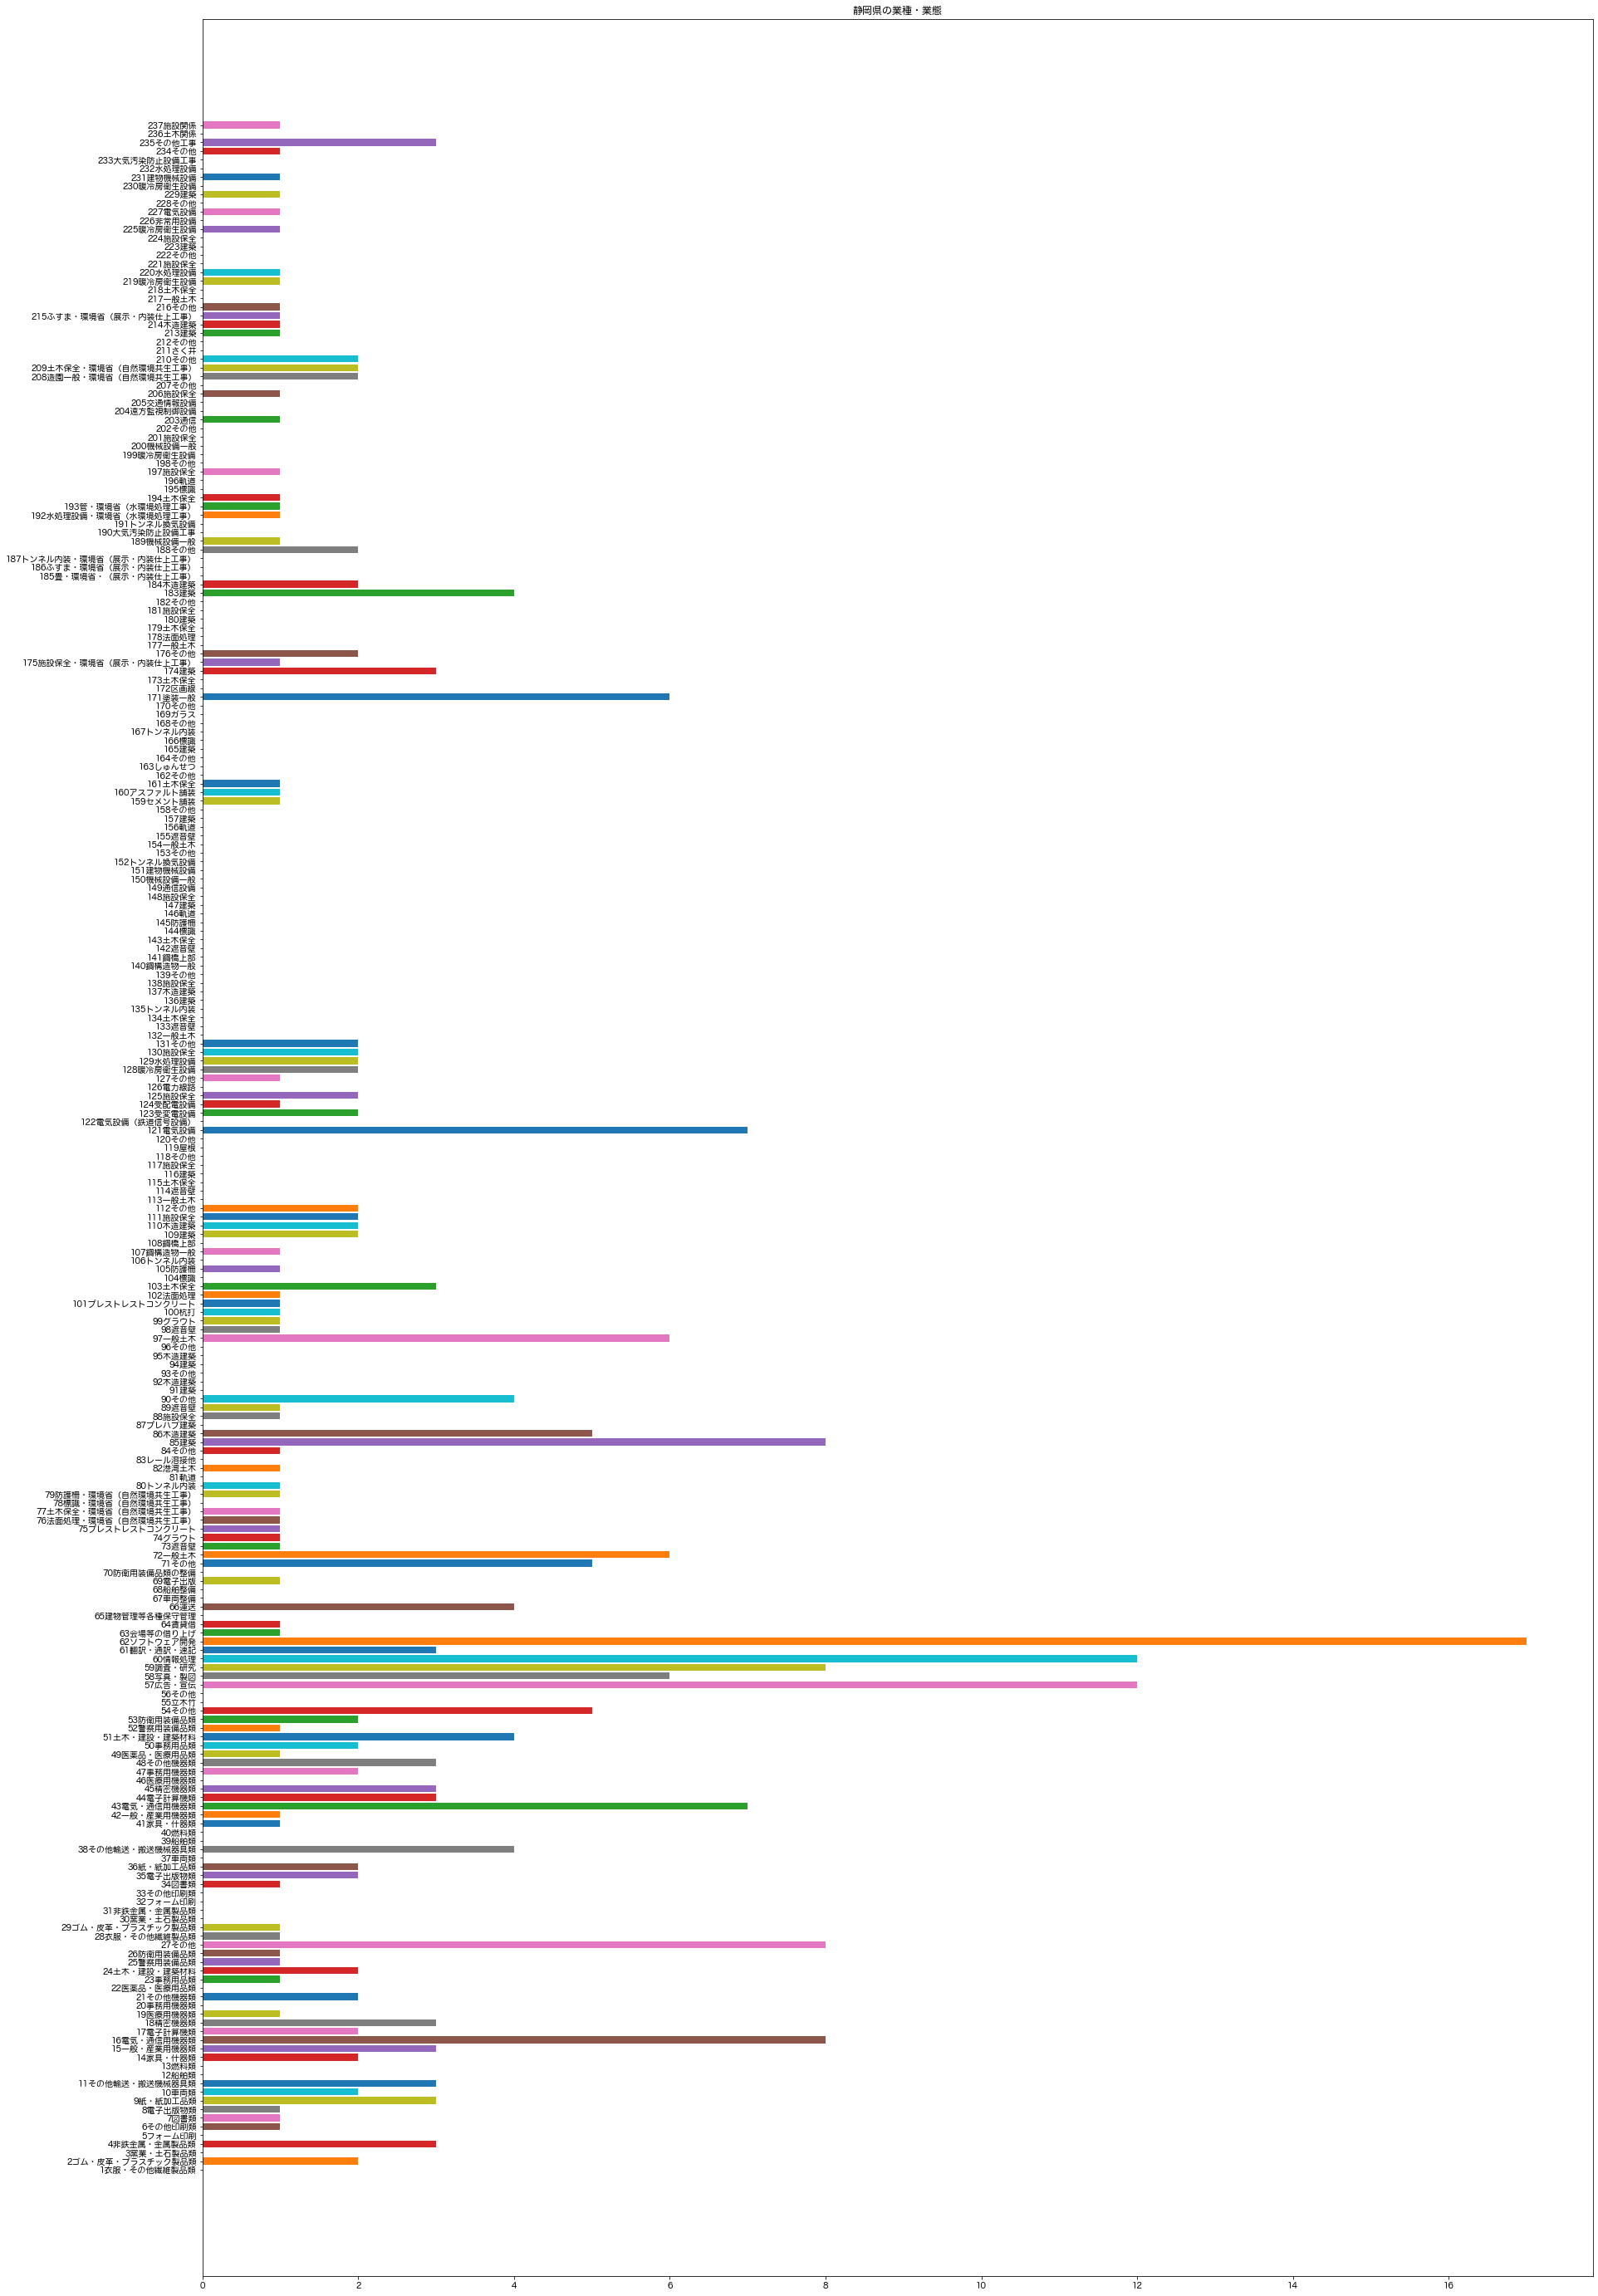

In [117]:
fig, ax = plt.subplots(figsize=(30, 50))
snum = []
pnum = 22

for index, row in enumerate(serviceCategories.iloc):
    y = df[df['location_prefectureCode'] == pnum]['services{:0>2}'.format(index+1)].sum()
    xlab = str(row[4])+row[5]
    ax.barh(xlab,y)
plt.title(areas['name'].tolist()[pnum-1]+'の業種・業態')

In [118]:
y = 

SyntaxError: invalid syntax (<ipython-input-118-3042731917eb>, line 1)